In [1]:
import logging
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# ------------------------------- Printing Function ------------------------------- #

def print_txt(text, filename):
    with open( filename + ".txt", "w") as log_file:
        print(text, file=log_file)

In [3]:
# ------------------------------- Opening Dataset ------------------------------- #

df = pd.read_csv("../prob10.csv")

# Convert '?' data to numpy NOT A NUMBER
df.replace("?", np.nan, inplace=True)

print_txt(df.dtypes, "Primary_dTypes")

In [4]:
# Changing object type to numerical values

def convert_to_numeric(df):
    for column in df.columns:
        try:
            df[column] = pd.to_numeric(df[column])
        except ValueError:
            pass 

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
# ------------------------------- Data Cleaning ------------------------------- #

convert_to_numeric(df)
print_txt(df.dtypes, 'Secondery_dTypes')

In [6]:
for column in df.columns:
    
    if df[column].dtype == "object":
        # Replace NaN with the mode for object-type columns
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Replace NaN with the mean for numerical-type columns
        df[column].fillna(df[column].mean(), inplace=True)


df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


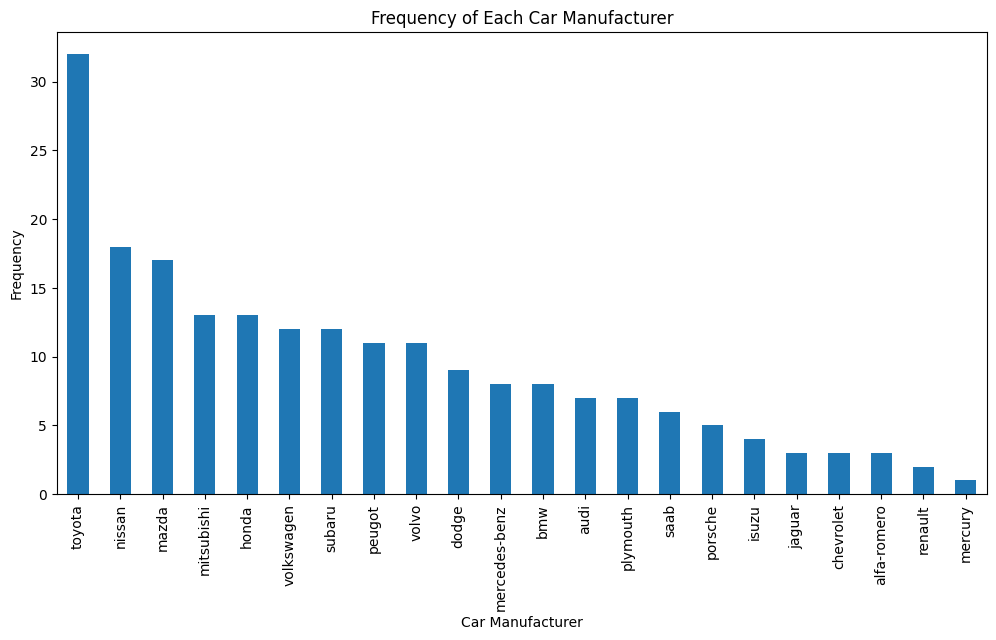

In [7]:
# The frequency of each car manufacturer (Bar Chart)

plt.figure(figsize=(12, 6))
df['make'].value_counts().plot(kind='bar')
plt.title('Frequency of Each Car Manufacturer')
plt.xlabel('Car Manufacturer')
plt.ylabel('Frequency')
plt.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
from scipy.stats import skew, kurtosis

dispersion_info = df.describe()

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

skewness = df[numerical_columns].apply(skew)
kurt = df[numerical_columns].apply(kurtosis)

# Display dispersion information, skewness, and kurtosis

print("\nDispersion Information:")
print(dispersion_info)
print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurt)

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine-size', y='price', data=df)
plt.title('Scatter Plot: Engine Size vs. Price')
plt.show()

In [ ]:
sns.pairplot(df[['length', 'wheel-base', 'curb-weight', 'horsepower', 'city-mpg','price']])
plt.suptitle("Pairplot for Selected Variables", y=1.02)
plt.show()

In [ ]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
categorical_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Boxplot for {col} and Price')
    plt.show()